<a href="https://colab.research.google.com/github/BooEiEi/project/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import pandas as pd
import os
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
import keras
from keras import metrics
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from keras.models import load_model

In [4]:
from google.colab import drive
drive.mount('/content/drive')
path = '/content/drive/My Drive/toydata'

Mounted at /content/drive


In [5]:
D = pd.read_csv(os.path.join(path, 'data.csv'))
D

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


In [6]:
D.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [7]:
print(D.shape,"\n",D.describe())

(4600, 18) 
               price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.600000e+03  4600.000000  4600.000000   4600.000000  4.600000e+03   
mean   5.519630e+05     3.400870     2.160815   2139.346957  1.485252e+04   
std    5.638347e+05     0.908848     0.783781    963.206916  3.588444e+04   
min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.228750e+05     3.000000     1.750000   1460.000000  5.000750e+03   
50%    4.609435e+05     3.000000     2.250000   1980.000000  7.683000e+03   
75%    6.549625e+05     4.000000     2.500000   2620.000000  1.100125e+04   
max    2.659000e+07     9.000000     8.000000  13540.000000  1.074218e+06   

            floors   waterfront         view    condition   sqft_above  \
count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000   
mean      1.512065     0.007174     0.240652     3.451739  1827.265435   
std       0.538288     0.084404     0.778405     0.677230   862.168977 

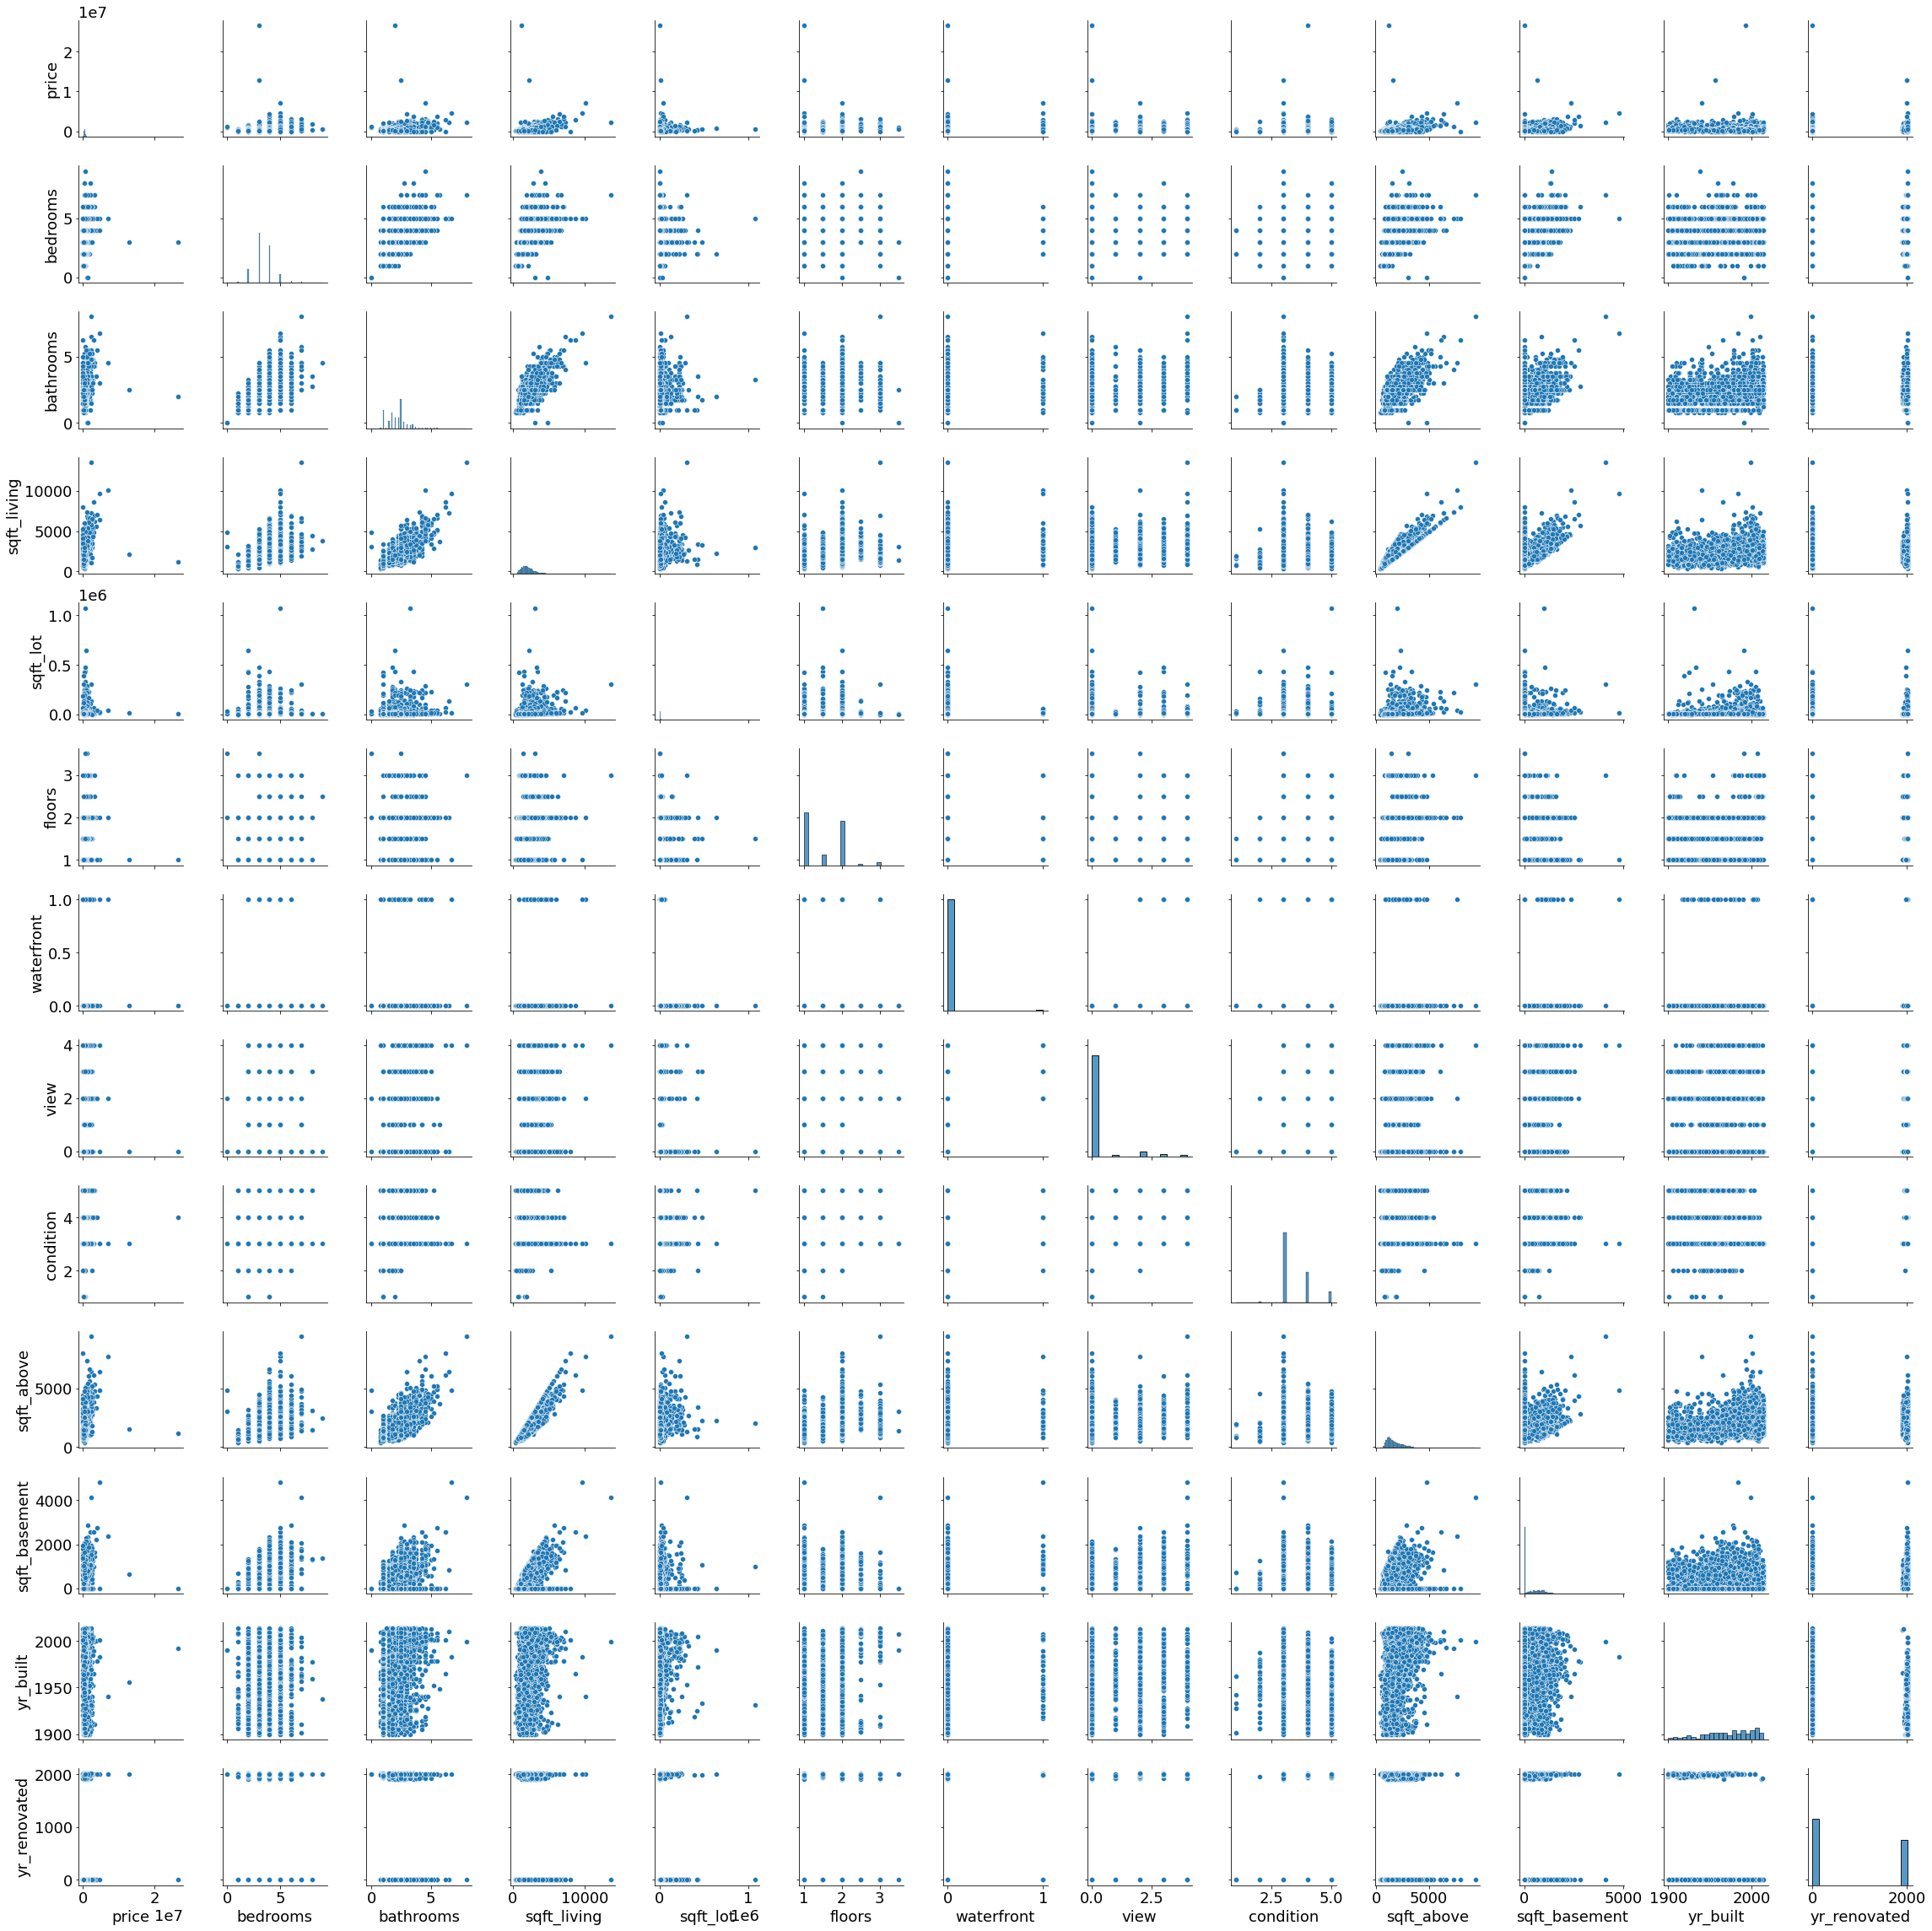

In [8]:
# Set text size
matplotlib.rcParams['font.size'] = 18

sns.pairplot(D)

In [9]:
X = D.iloc[:,2:]
X = X.drop(["street","statezip"],axis=1)
y= D.loc[:,["price"]]

In [10]:
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,country
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,USA
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,USA
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,USA
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,USA
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,Seattle,USA
4596,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,Bellevue,USA
4597,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,Renton,USA
4598,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,Seattle,USA


In [11]:
y

,price
0,3.130000e+05
1,2.384000e+06
2,3.420000e+05
3,4.200000e+05
4,5.500000e+05
...,...
4595,3.081667e+05
4596,5.343333e+05
4597,4.169042e+05
4598,2.034000e+05


In [12]:
X_dummies = pd.get_dummies(X,columns=["city","country"] )
X_train, X_test, y_train, y_test = train_test_split(X_dummies,y, test_size=.2, random_state=100)

In [13]:
X_dummies

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,...,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point,country_USA
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,...,0,1,0,0,0,0,0,0,0,1
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,...,1,0,0,0,0,0,0,0,0,1
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,...,0,0,0,0,0,0,0,0,0,1
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,...,0,0,0,0,0,0,0,0,0,1
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,...,1,0,0,0,0,0,0,0,0,1
4596,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,...,0,0,0,0,0,0,0,0,0,1
4597,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,...,0,0,0,0,0,0,0,0,0,1
4598,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,...,1,0,0,0,0,0,0,0,0,1


In [14]:
X_train

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,...,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point,country_USA
3521,3.0,1.75,1500,11968,1.0,0,0,3,1500,0,...,0,0,0,0,0,0,0,0,0,1
2075,6.0,2.50,3820,53173,1.0,0,0,4,2040,1780,...,0,0,0,0,0,0,0,0,0,1
4487,4.0,1.00,2080,3500,1.5,0,0,5,1260,820,...,1,0,0,0,0,0,0,0,0,1
1956,2.0,1.00,970,3400,1.0,0,0,3,970,0,...,1,0,0,0,0,0,0,0,0,1
2009,3.0,2.25,1530,1245,2.0,0,0,3,1050,480,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4149,3.0,1.50,1010,7683,1.5,0,0,5,1010,0,...,1,0,0,0,0,0,0,0,0,1
1890,4.0,1.75,2020,7029,1.0,0,0,4,1430,590,...,0,0,0,0,0,0,0,0,0,1
350,2.0,1.50,960,1808,2.0,0,0,3,960,0,...,1,0,0,0,0,0,0,0,0,1
79,3.0,2.50,2490,4343,2.0,0,0,3,2490,0,...,0,0,0,0,0,0,0,0,0,1


In [15]:
X_test

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,...,city_Seattle,city_Shoreline,city_Skykomish,city_Snoqualmie,city_Snoqualmie Pass,city_Tukwila,city_Vashon,city_Woodinville,city_Yarrow Point,country_USA
3386,4.0,2.50,1950,2617,1.5,0,0,4,1250,700,...,1,0,0,0,0,0,0,0,0,1
918,3.0,1.75,1800,10200,1.0,0,0,3,1800,0,...,0,0,0,0,0,0,0,0,0,1
338,4.0,1.00,3410,5000,2.0,0,0,5,2190,1220,...,1,0,0,0,0,0,0,0,0,1
4501,3.0,2.00,1570,7000,2.0,0,2,4,1050,520,...,1,0,0,0,0,0,0,0,0,1
2856,3.0,1.75,1310,8065,1.0,0,0,4,1310,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1954,4.0,1.50,1920,10403,1.0,0,0,3,1370,550,...,0,0,0,0,0,0,0,0,0,1
4424,3.0,1.50,1430,8960,1.0,0,0,4,1430,0,...,0,0,0,0,0,0,0,0,0,1
2674,3.0,1.50,1430,7347,1.0,0,0,3,820,610,...,0,0,0,0,0,0,0,0,0,1
2561,4.0,2.50,3030,8507,2.0,0,0,3,3030,0,...,0,0,0,0,0,0,0,0,0,1


In [16]:
y_train

,price
3521,224000.0
2075,611000.0
4487,0.0
1956,546000.0
2009,465000.0
...,...
4149,405000.0
1890,532000.0
350,358000.0
79,705380.0


In [17]:
y_test

,price
3386,5.190000e+05
918,4.425000e+05
338,1.039000e+06
4501,2.331667e+05
2856,4.350000e+05
...,...
1954,2.100000e+05
4424,1.786500e+05
2674,1.980000e+05
2561,9.020000e+05


In [18]:
model = keras.models.Sequential()
model.add(Dense(57, activation='relu', input_shape=(57,)))
model.add(Dense(57, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])

In [19]:
A = model.fit(X_train, y_train,batch_size=32, epochs=100, validation_split=0.25, callbacks=[keras.callbacks.EarlyStopping(patience=3)])

Epoch 1/100
87/87 [==============================] - 1s 5ms/step - loss: 720400351232.0000 - accuracy: 0.0000e+00 - val_loss: 365721026560.0000 - val_accuracy: 0.0000e+00
Epoch 2/100
87/87 [==============================] - 0s 2ms/step - loss: 620962512896.0000 - accuracy: 0.0000e+00 - val_loss: 267277877248.0000 - val_accuracy: 0.0000e+00
Epoch 3/100
87/87 [==============================] - 0s 3ms/step - loss: 537226149888.0000 - accuracy: 0.0000e+00 - val_loss: 184605736960.0000 - val_accuracy: 0.0000e+00
Epoch 4/100
87/87 [==============================] - 0s 2ms/step - loss: 461623820288.0000 - accuracy: 0.0000e+00 - val_loss: 117547597824.0000 - val_accuracy: 0.0000e+00
Epoch 5/100
87/87 [==============================] - 0s 3ms/step - loss: 414980014080.0000 - accuracy: 0.0000e+00 - val_loss: 87586570240.0000 - val_accuracy: 0.0000e+00
Epoch 6/100
87/87 [==============================] - 0s 3ms/step - loss: 398660304896.0000 - accuracy: 0.0000e+00 - val_loss: 79049162752.0000 - v

In [20]:
model.evaluate(X_test, y_test)

29/29 [==============================] - 0s 1ms/step - loss: 76184428544.0000 - accuracy: 0.0000e+00


[76184428544.0, 0.0]

In [21]:
prediction = model.predict(X_test)
print(prediction)

[[ 556973.1 ]
 [ 480364.72]
 [ 935935.7 ]
 [ 436940.5 ]
 [ 352768.16]
 [ 786218.  ]
 [ 304918.5 ]
 [ 250191.6 ]
 [ 348289.1 ]
 [ 533594.1 ]
 [ 748929.  ]
 [ 625218.3 ]
 [ 499627.22]
 [ 996996.6 ]
 [ 827709.  ]
 [ 584022.1 ]
 [1023114.75]
 [ 804337.9 ]
 [ 760060.  ]
 [ 685667.  ]
 [ 934588.25]
 [ 710405.7 ]
 [ 640033.3 ]
 [ 788728.1 ]
 [ 770166.25]
 [ 984188.75]
 [ 679499.56]
 [ 472241.97]
 [ 422598.72]
 [ 289658.4 ]
 [ 208185.86]
 [ 614426.  ]
 [ 405448.4 ]
 [ 324088.22]
 [ 579516.9 ]
 [ 499087.78]
 [ 371575.6 ]
 [ 448091.  ]
 [ 399345.97]
 [ 426446.16]
 [1006836.75]
 [ 394013.5 ]
 [ 842474.6 ]
 [1228106.  ]
 [ 873317.9 ]
 [ 555867.4 ]
 [ 656841.9 ]
 [ 756439.1 ]
 [ 904171.6 ]
 [ 303641.9 ]
 [ 695193.2 ]
 [ 366124.47]
 [ 253793.12]
 [ 471873.97]
 [ 351577.75]
 [1053786.5 ]
 [ 540841.2 ]
 [ 394018.3 ]
 [ 678948.1 ]
 [ 655148.06]
 [ 682057.56]
 [ 883693.9 ]
 [ 395848.9 ]
 [ 374698.8 ]
 [ 294490.7 ]
 [ 452388.84]
 [ 484526.3 ]
 [ 538668.4 ]
 [ 403890.97]
 [ 480887.5 ]
 [ 741283.94]
 [ 593

In [22]:
print(y_test)

             price
3386  5.190000e+05
918   4.425000e+05
338   1.039000e+06
4501  2.331667e+05
2856  4.350000e+05
...            ...
1954  2.100000e+05
4424  1.786500e+05
2674  1.980000e+05
2561  9.020000e+05
3736  4.500000e+05

[920 rows x 1 columns]
